# Objectives:

-Tune the following hyperparameters:
1. learning rate
2. number of epochs
3. batch size
-Interpret different kinds of loss curves

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

2022-10-14 12:44:07.054026: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-14 12:44:07.128756: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-14 12:44:07.132002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-14 12:44:07.132009: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Define functions that build and train a model

1. build_model(my_learning_rate),
builds an empty model
2. train_model(model, feature, label, epochs),
trains the model from the passed examples (feature and label)

In [7]:
def build_model(my_learning_rate):
    '''Create and compile a simple linear regression m model.'''
    #most simple tf.keras models are sequential
    #a sequential model contains one or more layers
    model = tf.keras.models.Sequential()
    
    #topography of models
    #topography of a simple linear regression model is a single node in a single layer
    model.add(tf.keras.layers.Dense(units=1,
                                   input_shape=(1,)))
    
    #compile into a code that tensorflow can execute efficiently
    #configure training to minimize the model's mean squared error
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                 loss='mean_squared_error',
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

def train_model(model, feature, label, epochs, batch_size):
    '''Train the model by feeding it data.'''
    #feed the feature and label to the model
    #the model will train for specific number of epochs
    history = model.fit(x=feature,
                       y=label,
                       batch_size=batch_size,
                       epochs = epochs)
    
    #gather weight and bias
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    #list of epochs is stored seperately from the rest of history
    epochs = history.epoch
    
    #gather history of each epoch
    hist = pd.DataFrame(history.history)
    
    #specifically gather the model's root mean squared error at each epoch
    rmse = hist["root_mean_squared_error"]
    
    return trained_weight, trained_bias, epochs, rmse

print("Defined build model and train model")

Defined build model and train model


## Define plotting functions
Following two plots using Matplotlib:
1. feathure values vs. label values, and a line showing the output of the trained model
2. a loss curve



In [11]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    '''Plot the trained model against the training feature and label'''
    #label the axes
    plt.xlabel("feature")
    plt.ylabel("label")
    
    #plot feature vs. label
    plt.scatter(feature, label)
    
    #red line (x0, y0) to (x1, y1)
    x0 = 0 
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c = 'r')
    
    #render
    plt.show()
    
    
def plot_the_loss_curve(epochs, rmse):
    '''Plot the loss curve, which shows loss vs. epoch.'''
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs, rmse, label = "Loss")
    plt.legend()
    plt.ylim([rmse.min() * 0.97, rmse.max()])
    plt.show()
    
print("Defined plot_the_model and plot_the_loss_curve functions")

Defined plot_the_model and plot_the_loss_curve functions


## Define the dataset
Consists of 12 examples. Each example consists of one feature and one label.

In [12]:
my_feature = ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
my_label = ([5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters
1. learning rate
2. epochs
3. batch size

Epoch 1/60
2/2 [==============================] - 0s 2ms/step - loss: 189.9487 - root_mean_squared_error: 13.7822
Epoch 2/60
2/2 [==============================] - 0s 2ms/step - loss: 92.1123 - root_mean_squared_error: 9.5975
Epoch 3/60
2/2 [==============================] - 0s 2ms/step - loss: 52.8979 - root_mean_squared_error: 7.2731
Epoch 4/60
2/2 [==============================] - 0s 2ms/step - loss: 32.7740 - root_mean_squared_error: 5.7249
Epoch 5/60
2/2 [==============================] - 0s 2ms/step - loss: 22.3515 - root_mean_squared_error: 4.7277
Epoch 6/60
2/2 [==============================] - 0s 2ms/step - loss: 14.3271 - root_mean_squared_error: 3.7851
Epoch 7/60
2/2 [==============================] - 0s 1ms/step - loss: 7.6525 - root_mean_squared_error: 2.7663
Epoch 8/60
2/2 [==============================] - 0s 1ms/step - loss: 4.1687 - root_mean_squared_error: 2.0417
Epoch 9/60
2/2 [==============================] - 0s 1ms/step - loss: 2.7584 - root_mean_squared_error: 

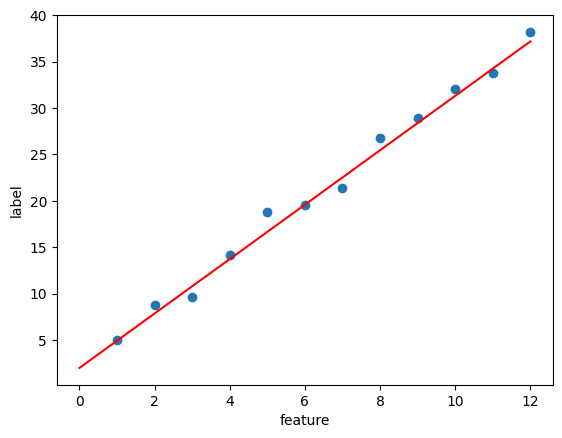

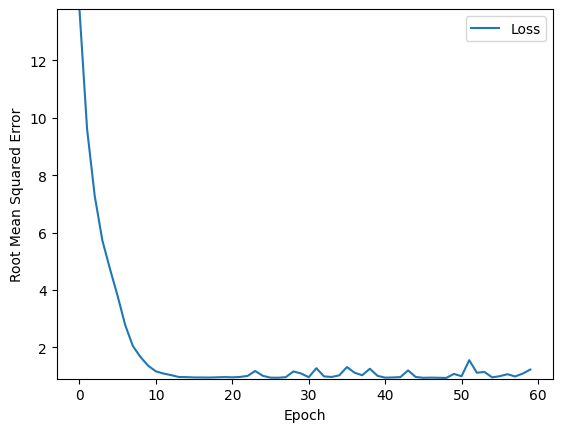

In [89]:
learning_rate = .1
epochs = 60
my_batch_size = 9

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                        my_label, epochs,
                                                        my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

1. Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero
2. If the training loss does not converge, train for more epochs
3. If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging
4. If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate
5. Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination
6. Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation
7. For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory